Задача регрессии (для IC50)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model_linear = LinearRegression()

model_linear.fit(X_train_ic, y_train_ic)
pred_linear_ic = model_linear.predict(X_test_ic)

scores_linear = cross_val_score(model_linear, X_train_ic, y_train_ic, cv=5, scoring='r2')
print("Среднее R2:", scores_linear.mean())

Среднее R2: 0.19635426039008214


In [86]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor()

model_forest.fit(X_train_ic, y_train_ic)
pred_forest_ic = model_forest.predict(X_test_ic)
scores_forest = cross_val_score(model_forest, X_train_ic, y_train_ic, cv=5, scoring='r2')
print("Среднее R2:", scores_forest.mean())

Среднее R2: 0.25778017944636966


In [88]:
from sklearn.ensemble import GradientBoostingRegressor

model_grad = GradientBoostingRegressor()

model_grad.fit(X_train_ic, y_train_ic)
pred_grad_ic = model_grad.predict(X_test_ic)
scores_grad = cross_val_score(model_grad, X_train_ic, y_train_ic, cv=5, scoring='r2')
print("Среднее R2:", scores_grad.mean())

Среднее R2: 0.19206271466617383


Применение только алгоритмов машинного обучения даже при должной обработке и кросс-валидации дают крайне низкие результаты. В силу специфики поставленной задачи, возможно, работать со всеми химическими соединениями и биологическими классами подряд не совсем логично - они могут быть различнуми по типу соединеяни и молекулярной структуре, из-за чего работа с видами этих соединений по отдельности (применение к каждому виду алгоритмов машинного обучения) покажет лучший результат. Для решения задачи можно попробовать применить кластеризацию, и только после этого использовать алгоритмы машинного обучения, так как кластеризация способна выявить эти взаимосвязи.

In [91]:
from sklearn.cluster import KMeans

kmeans_ic = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_ic.fit_predict(X_new_ic)

C:\Users\dfu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

cluster_metrics = {}  #мы будем проходиться по каждому кластеру и к каждому из них применять выбранный алгоритм

for c in np.unique(clusters):
    X_cluster_ic = X_new_ic[clusters == c]
    y_cluster_ic = Y_ic[clusters == c]
    
    model = LinearRegression().fit(X_cluster_ic, y_cluster_ic)
    y_pred_cluster_ic = model.predict(X_cluster_ic)

    mae = mean_absolute_error(y_cluster_ic, y_pred_cluster_ic)
    mse = mean_squared_error(y_cluster_ic, y_pred_cluster_ic)
    r2 = r2_score(y_cluster_ic, y_pred_cluster_ic)

    cluster_metrics[c] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

for cid, metrics in cluster_metrics.items():
    print(f"Кластер {cid}: MAE={metrics['MAE']:.3f}, MSE={metrics['MSE']:.3f}, R2={metrics['R2']:.3f}")

Кластер 0: MAE=0.414, MSE=0.268, R2=0.363
Кластер 1: MAE=0.380, MSE=0.214, R2=0.462
Кластер 2: MAE=0.058, MSE=0.019, R2=0.946


Мы видим, что результаты работы алгоритма линейной регрессии с применением кластеризации стали значительно лучше - следовательно, в данной задаче необходимо учитывать физико-химические особенности соединений и работать с разделенными по кластерам данными по отдельности - применение алгоритмов к более однородным данным внутри кластера улучшает качество обучения. Протестируем использование других алгоритмов обучения.

In [95]:
cluster_metrics_forest = {}

for c in np.unique(clusters):
    X_cluster_ic = X_new_ic[clusters == c]
    y_cluster_ic = Y_ic[clusters == c]
    
    model = RandomForestRegressor().fit(X_cluster_ic, y_cluster_ic)
    y_pred_cluster_ic = model.predict(X_cluster_ic)

    mae = mean_absolute_error(y_cluster_ic, y_pred_cluster_ic)
    mse = mean_squared_error(y_cluster_ic, y_pred_cluster_ic)
    r2 = r2_score(y_cluster_ic, y_pred_cluster_ic)

    cluster_metrics_forest[c] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

for cid, metrics in cluster_metrics_forest.items():
    print(f"Кластер {cid}: MAE={metrics['MAE']:.3f}, MSE={metrics['MSE']:.3f}, R2={metrics['R2']:.3f}")

Кластер 0: MAE=0.202, MSE=0.081, R2=0.808
Кластер 1: MAE=0.173, MSE=0.052, R2=0.868
Кластер 2: MAE=0.181, MSE=0.050, R2=0.859


In [99]:
from sklearn.ensemble import GradientBoostingRegressor

cluster_metrics_grad = {}

for c in np.unique(clusters):
    X_cluster_ic = X_new_ic[clusters == c]
    y_cluster_ic = Y_ic[clusters == c]
    
    model = GradientBoostingRegressor().fit(X_cluster_ic, y_cluster_ic)
    y_pred_cluster_ic = model.predict(X_cluster_ic)

    mae = mean_absolute_error(y_cluster_ic, y_pred_cluster_ic)
    mse = mean_squared_error(y_cluster_ic, y_pred_cluster_ic)
    r2 = r2_score(y_cluster_ic, y_pred_cluster_ic)

    cluster_metrics_grad[c] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

for cid, metrics in cluster_metrics_grad.items():
    print(f"Кластер {cid}: MAE={metrics['MAE']:.3f}, MSE={metrics['MSE']:.3f}, R2={metrics['R2']:.3f}")

Кластер 0: MAE=0.260, MSE=0.114, R2=0.730
Кластер 1: MAE=0.130, MSE=0.033, R2=0.918
Кластер 2: MAE=0.065, MSE=0.019, R2=0.946


Лучше всего на задаче регресси себя показал градиентный бустинг с использованием кластеризации. При этом мы видим, что нулевой кластер несет в себе меньше всего информации, а первый и второй более информативны, возможно, из-за того, что классы в них более информативны, а химические свойства более однородны. Поэтому для оставшихся регрессионных задач будем использовать именно это сочетание методов.

In [102]:
kmeans_cc = KMeans(n_clusters=3, random_state=42)
clusters_cc = kmeans_cc.fit_predict(X_new_cc)

cluster_metrics_cc = {}

for c in np.unique(clusters_cc):
    X_cluster_cc = X_new_cc[clusters == c]
    y_cluster_cc = Y_cc[clusters == c]
    
    model = GradientBoostingRegressor().fit(X_cluster_cc, y_cluster_cc)
    y_pred_cluster_cc = model.predict(X_cluster_cc)

    mae = mean_absolute_error(y_cluster_cc, y_pred_cluster_cc)
    mse = mean_squared_error(y_cluster_cc, y_pred_cluster_cc)
    r2 = r2_score(y_cluster_cc, y_pred_cluster_cc)

    cluster_metrics_cc[c] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

for cid, metrics in cluster_metrics_cc.items():
    print(f"Кластер {cid}: MAE={metrics['MAE']:.3f}, MSE={metrics['MSE']:.3f}, R2={metrics['R2']:.3f}")

C:\Users\dfu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Кластер 0: MAE=0.266, MSE=0.157, R2=0.687
Кластер 1: MAE=0.089, MSE=0.014, R2=0.964
Кластер 2: MAE=0.040, MSE=0.012, R2=0.978


In [104]:
kmeans_si = KMeans(n_clusters=3, random_state=42)
clusters_si = kmeans_si.fit_predict(X_new_si)

cluster_metrics_si = {}

for c in np.unique(clusters_si):
    X_cluster_si = X_new_si[clusters == c]
    y_cluster_si = Y_si[clusters == c]
    
    model = GradientBoostingRegressor().fit(X_cluster_si, y_cluster_si)
    y_pred_cluster_si = model.predict(X_cluster_si)

    mae = mean_absolute_error(y_cluster_si, y_pred_cluster_si)
    mse = mean_squared_error(y_cluster_si, y_pred_cluster_si)
    r2 = r2_score(y_cluster_si, y_pred_cluster_si)

    cluster_metrics_si[c] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

for cid, metrics in cluster_metrics_si.items():
    print(f"Кластер {cid}: MAE={metrics['MAE']:.3f}, MSE={metrics['MSE']:.3f}, R2={metrics['R2']:.3f}")

C:\Users\dfu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Кластер 0: MAE=0.263, MSE=0.142, R2=0.519
Кластер 1: MAE=0.107, MSE=0.020, R2=0.913
Кластер 2: MAE=0.067, MSE=0.031, R2=0.893


Визуализируем кластеры для задач регрессии. Как видно из графиков, кластеры 0 и 2 в IC50 и CC50 больше, чем кластер 1. В SI кластер 1 меньше других, что также отражено в метриках accuracy.

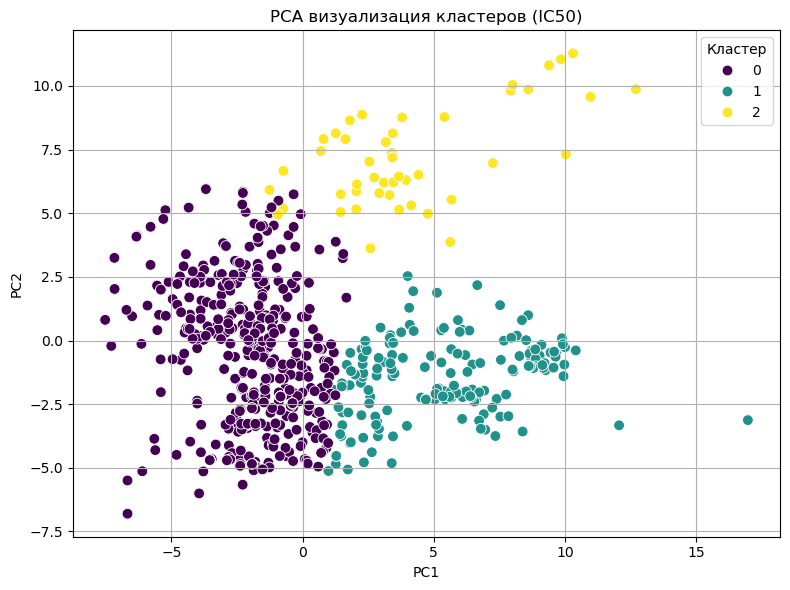

In [108]:
from sklearn.decomposition import PCA

pca_ic = PCA(n_components=2)
X_pca_ic = pca_ic.fit_transform(X_new_ic)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_ic[:, 0], y=X_pca_ic[:, 1], hue=clusters_ic, palette='viridis', s=60)
plt.title("PCA визуализация кластеров (IC50)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()

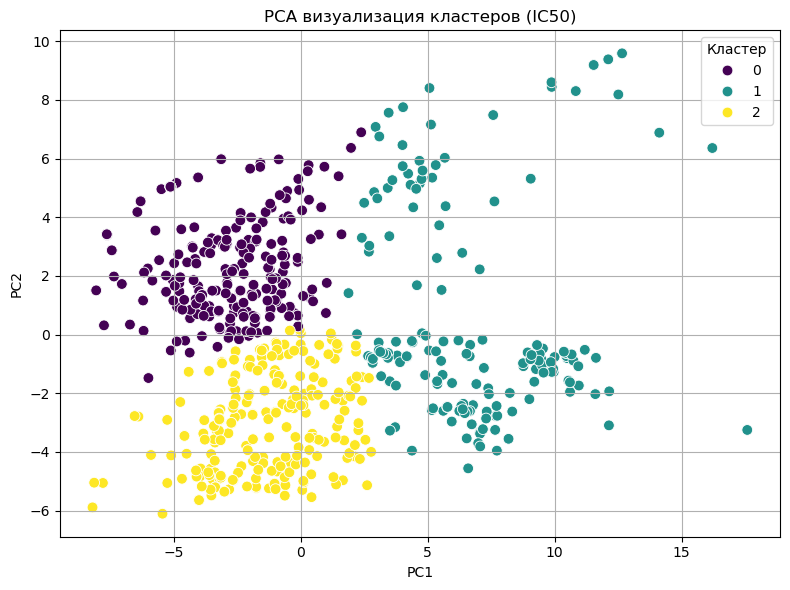

In [112]:
pca_cc = PCA(n_components=2)
X_pca_cc = pca_cc.fit_transform(X_new_cc)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_cc[:, 0], y=X_pca_cc[:, 1], hue=clusters_cc, palette='viridis', s=60)
plt.title("PCA визуализация кластеров (IC50)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()

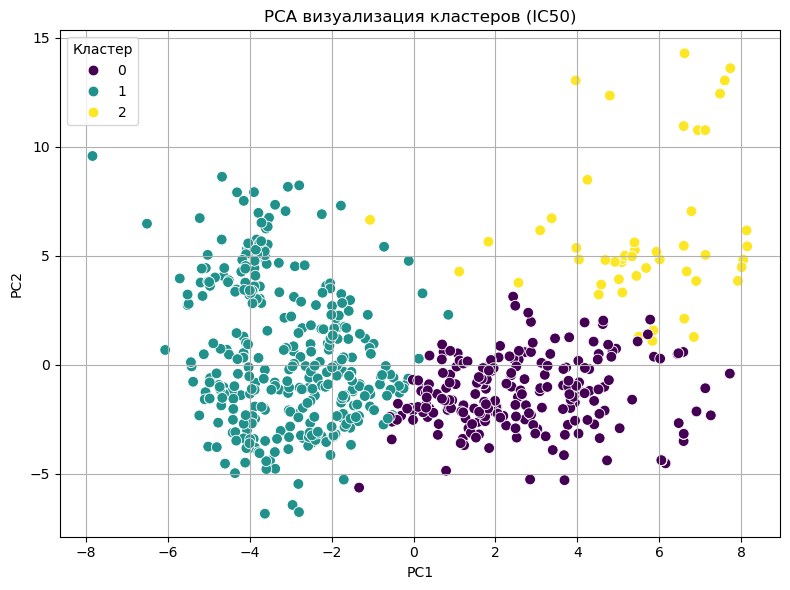

In [114]:
pca_si = PCA(n_components=2)
X_pca_si = pca_si.fit_transform(X_new_si)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_si[:, 0], y=X_pca_si[:, 1], hue=clusters_si, palette='viridis', s=60)
plt.title("PCA визуализация кластеров (IC50)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()

Перейдем к задачам классификации.

In [120]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression()

model_logreg.fit(X_train_class_ic, y_train_class_ic)
pred_ic_class = model_logreg.predict(X_test_class_ic)

accuracy_logreg = accuracy_score(y_test_class_ic, pred_ic_class)
print(f'Accuracy: {accuracy_logreg}')

Accuracy: 0.6296296296296297


In [122]:
from sklearn.neighbors import KNeighborsClassifier

model_kneighb = KNeighborsClassifier()

model_kneighb.fit(X_train_class_ic, y_train_class_ic)
pred_ic_kneighb = model_kneighb.predict(X_test_class_ic)

accuracy_kneighb = accuracy_score(y_test_class_ic, pred_ic_kneighb)
print(f'Accuracy: {accuracy_kneighb}')

Accuracy: 0.6157407407407407


In [124]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier()

model_forest.fit(X_train_class_ic, y_train_class_ic)
pred_ic_forest = model_forest.predict(X_test_class_ic)

accuracy_forest = accuracy_score(y_test_class_ic, pred_ic_forest)
print(f'Accuracy: {accuracy_forest}')

Accuracy: 0.6388888888888888


Метрики по классификации уже немного лучше в начале, по сравнение с регрессией, однако их также нужно улучшить. По аналогии, применим кластеризацию перед основным алгоритмом обучения.

In [127]:
cluster_metrics_logreg = {}

for c in np.unique(clusters):
    X_cluster_ic = X_new_ic[clusters == c]
    y_cluster_ic = ic50_cl[clusters == c]
    
    model = LogisticRegression().fit(X_cluster_ic, y_cluster_ic)
    y_pred_cluster_ic = model.predict(X_cluster_ic)

    accuracy = accuracy_score(y_cluster_ic, y_pred_cluster_ic)

    cluster_metrics_logreg[c] = {
        'Accuracy': accuracy      
    }

for cid, metrics in cluster_metrics_logreg.items():
    print(f"Кластер {cid}: Accuracy={metrics['Accuracy']:.5f}")

Кластер 0: Accuracy=0.73374
Кластер 1: Accuracy=0.70455
Кластер 2: Accuracy=0.82692


In [129]:
cluster_metrics_neigbs = {}

for c in np.unique(clusters):
    X_cluster_ic = X_new_ic[clusters == c]
    y_cluster_ic = ic50_cl[clusters == c]
    
    model = KNeighborsClassifier().fit(X_cluster_ic, y_cluster_ic)
    y_pred_cluster_ic = model.predict(X_cluster_ic)

    accuracy = accuracy_score(y_cluster_ic, y_pred_cluster_ic)

    cluster_metrics_neigbs[c] = {
        'Accuracy': accuracy      
    }

for cid, metrics in cluster_metrics_neigbs.items():
    print(f"Кластер {cid}: Accuracy={metrics['Accuracy']:.5f}")

Кластер 0: Accuracy=0.76423
Кластер 1: Accuracy=0.74432
Кластер 2: Accuracy=0.82692


In [131]:
cluster_metrics_forest = {}

for c in np.unique(clusters):
    X_cluster_ic = X_new_ic[clusters == c]
    y_cluster_ic = ic50_cl[clusters == c]
    
    model = RandomForestClassifier().fit(X_cluster_ic, y_cluster_ic)
    y_pred_cluster_ic = model.predict(X_cluster_ic)

    accuracy = accuracy_score(y_cluster_ic, y_pred_cluster_ic)

    cluster_metrics_forest[c] = {
        'Accuracy': accuracy      
    }

for cid, metrics in cluster_metrics_forest.items():
    print(f"Кластер {cid}: Accuracy={metrics['Accuracy']:.5f}")

Кластер 0: Accuracy=0.94309
Кластер 1: Accuracy=0.97159
Кластер 2: Accuracy=0.94231
